In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv.imread("../data/drohne-signals/traffic_light0026.png",0)          # queryImage
img2 = cv.imread('../data/traffic_light.png',0) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)


In [3]:
print(kp1, des1)

(<KeyPoint 0x7f4648e690f0>, <KeyPoint 0x7f4648e69120>, <KeyPoint 0x7f4648e69180>, <KeyPoint 0x7f4648e693f0>, <KeyPoint 0x7f4648e69060>, <KeyPoint 0x7f4648e69030>, <KeyPoint 0x7f4648e69270>, <KeyPoint 0x7f4648e7f2a0>, <KeyPoint 0x7f4648e7f810>, <KeyPoint 0x7f4648e7f4b0>, <KeyPoint 0x7f4648e7f7e0>, <KeyPoint 0x7f4648e7f840>, <KeyPoint 0x7f4648e7f600>, <KeyPoint 0x7f4648e7f450>, <KeyPoint 0x7f4648e7f870>, <KeyPoint 0x7f4648e7f630>, <KeyPoint 0x7f4648e7f6f0>, <KeyPoint 0x7f4648e7f780>, <KeyPoint 0x7f4648e7f7b0>, <KeyPoint 0x7f4648e7f720>, <KeyPoint 0x7f4648e7f300>, <KeyPoint 0x7f4648e7f660>, <KeyPoint 0x7f4648e7f690>, <KeyPoint 0x7f4648e7f5d0>, <KeyPoint 0x7f4648e7f510>, <KeyPoint 0x7f4648e7f540>, <KeyPoint 0x7f4648e7f570>, <KeyPoint 0x7f4648e7f8a0>, <KeyPoint 0x7f4648e7f750>, <KeyPoint 0x7f4648e7f6c0>, <KeyPoint 0x7f4648e7f8d0>, <KeyPoint 0x7f4648e7fa20>, <KeyPoint 0x7f4648e7f9c0>, <KeyPoint 0x7f4648e7f900>, <KeyPoint 0x7f4648e7f4e0>, <KeyPoint 0x7f4648e7f360>, <KeyPoint 0x7f4648e7f480>, 

In [5]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

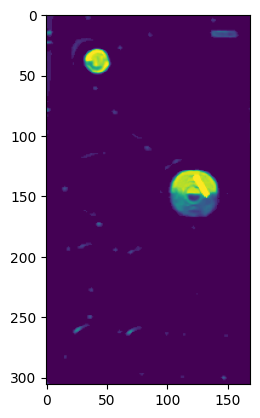

In [6]:
import matplotlib.pyplot as plt
plt.imshow(img2)
plt.show()